In [1]:
#from customplot import *

#import sqlite3
%autosave 0
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

Autosave disabled


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
def printcfm(y_test,y_pred,title='confusion matrix'):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title=title)

In [4]:
def plotRoc(y_real, y_pred_prob):
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_real, y_pred_prob)
    
    # Calculate AUC
    auc = roc_auc_score(y_real, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.text(1, 0.5, "AUC: %3.3f" % (auc), {'color': 'C2', 'fontsize': 18}, va="bottom", ha="right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()


In [5]:
#Setando configurações de visualização
pd.options.display.max_rows=350
pd.options.display.max_columns=60

In [6]:
# df=pd.read_csv('baseProjeto_entradaModelo.csv', index_col=0)

In [7]:
# df

# df.columns

# X=df[['ATRIB_MED1', 'ATRIB_MAX1',
#        'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
#        'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

# X

# X.info()

# cat=['MGP1_sim', 'MGP2_sim', 'MGP3_sim', 'MGP4_sim',
#        'MGP5_sim', 'MGP6_sim', 'MGP7_sim', 'MGP8_sim', 'MGP9_sim', 'MGP10_sim',
#        'MGP11_sim', 'MGP12_sim', 'MGP13_sim', 'MGP14_sim',]
# X[cat] = X[cat].astype('category')

# X.info()

# y = df['Perda30']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=21)

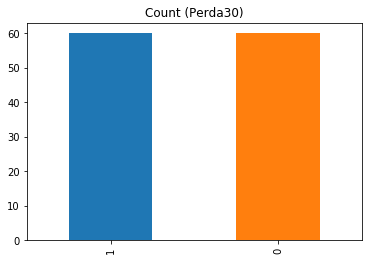

In [8]:
# train=pd.read_csv('baseProjetoTrainOver.csv', index_col=0)
# test=pd.read_csv('baseProjetoTest.csv', index_col=0)

train=pd.read_csv('baseProjetoTrainOverFase1.csv', index_col=0)
test=pd.read_csv('baseProjetoTestFase1.csv', index_col=0)

X_train = train[['ATRIB_MAX1',
        'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
        'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

X_test = test[['ATRIB_MAX1',
        'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
        'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

y_test = test['Perda30']

y_train = train['Perda30']

y_train.value_counts().plot(kind='bar', title='Count (Perda30)');

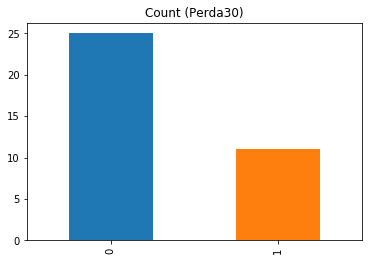

In [9]:
y_test.value_counts().plot(kind='bar', title='Count (Perda30)');

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

<br>
## KNeighbors

In [11]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30,
                          p=2, metric='minkowski', metric_params=None, n_jobs=-1)

In [12]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
y_pred = knn.predict(X_test_scaled) 
accuracy_score(y_test, y_pred)

0.5555555555555556

Confusion matrix, without normalization


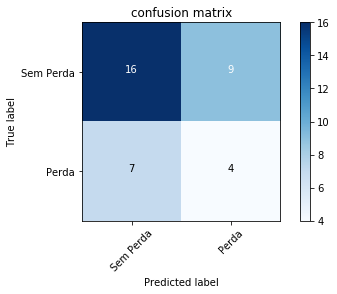

In [14]:
printcfm(y_test,y_pred,title='confusion matrix')

In [15]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.70      0.64      0.67        25
          1       0.31      0.36      0.33        11

avg / total       0.58      0.56      0.56        36



## Fine-tunning the model.

### 2 - Grid Search

In [16]:
parameters = {'n_neighbors': [3,4,15], 
              'weights' : ['uniform', 'distance'],
              'leaf_size': [10,30,50,100]
              }
cv = GridSearchCV(knn, param_grid=parameters, verbose=3, n_jobs=-1)

In [17]:
cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    9.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [3, 4, 15], 'weights': ['uniform', 'distance'], 'leaf_size': [10, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [18]:
print("Best params: ", cv.best_params_,) 
print("Best Score: %3.3f" %(cv.best_score_))
y_pred = cv.predict(X_train_scaled)
final_model =cv.best_estimator_
print(final_model)

Best params:  {'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}
Best Score: 0.883
KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='distance')


In [19]:
# y_pred = cv.predict(X_test)

## Predicting the Classes in Trainning Set

In [20]:
# y_pred = final_model.predict(X_train_scaled)
y_pred = final_model.predict(X_train_scaled)
y_pred_prob = final_model.predict_proba(X_train_scaled)[:,1]

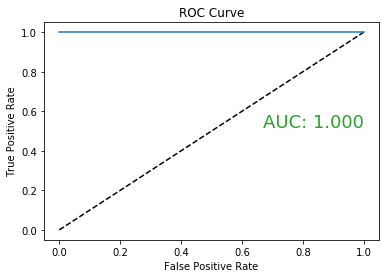

In [21]:
plotRoc(y_train, y_pred_prob)

Confusion matrix, without normalization


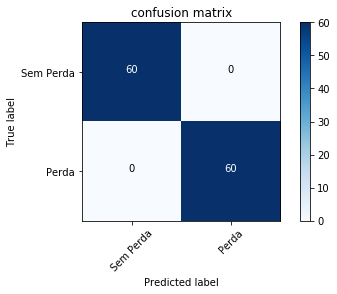

In [22]:
printcfm(y_train,y_pred)

# Evaluating the model with Cross-Validation

In [23]:
y_pred_prob = final_model.predict_proba(X_train_scaled)[:,1]

In [24]:
cv_scores = cross_val_score(final_model, X_train_scaled, y_train, cv=5, verbose=3, n_jobs=-1)
print(cv_scores)

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.9s finished


[0.88 0.92 0.83 0.88 0.96]


In [25]:
y_train_pred = cross_val_predict(final_model, X_train_scaled, y_train, cv=3, verbose=3)
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if cv_scores.ndim == 2:
    cv_scores = y_scores[:, 1]
# print(y_scores)
# print(np.mean(y_scores))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


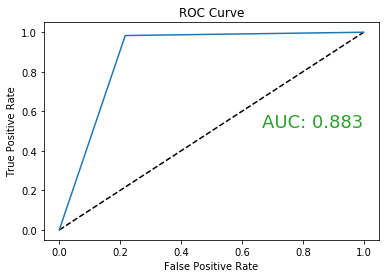

In [26]:
plotRoc(y_train, y_train_pred)

Confusion matrix, without normalization


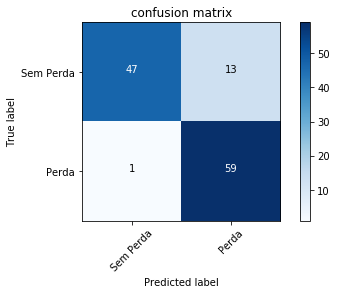

In [27]:
printcfm(y_train, y_train_pred, title='confusion matrix')

In [28]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.98      0.78      0.87        60
          1       0.82      0.98      0.89        60

avg / total       0.90      0.88      0.88       120



## Predicting the Classes in Test Set

In [29]:
y_pred = final_model.predict(X_test_scaled)
y_pred_prob = final_model.predict_proba(X_test_scaled)[:,1]
#y_pred = final_model.predict(X_test)

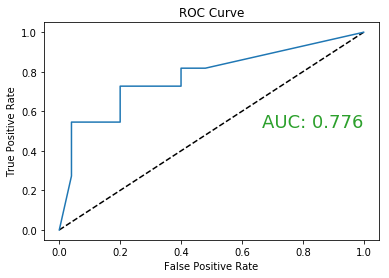

In [30]:
plotRoc(y_test, y_pred_prob)

Confusion matrix, without normalization


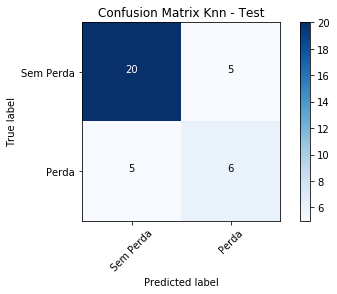

In [31]:
printcfm(y_test,y_pred,'Confusion Matrix Knn - Test')

In [32]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.80      0.80        25
          1       0.55      0.55      0.55        11

avg / total       0.72      0.72      0.72        36



In [33]:
X=np.concatenate((X_train_scaled,X_test_scaled),axis=0)
X

array([[ 1.13,  1.2 ,  1.58, ...,  0.56, -0.65,  0.47],
       [-1.3 ,  1.2 , -0.37, ..., -1.77, -0.65, -2.11],
       [-1.3 ,  1.2 ,  0.  , ..., -1.77, -0.65,  0.47],
       ...,
       [ 1.05, -0.58, -0.47, ...,  0.75,  1.73,  0.35],
       [ 1.05, -0.27, -0.22, ...,  0.75,  1.73,  0.35],
       [-0.52, -0.65, -0.05, ..., -1.33, -0.58,  0.35]])

In [34]:
y=np.append(y_train,y_test)

Automatically created module for IPython interactive environment


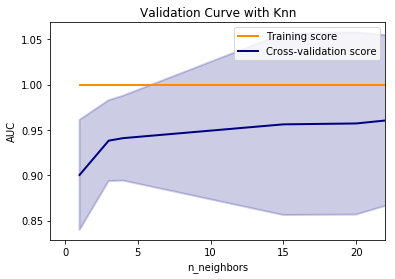

In [35]:
print(__doc__)

# import matplotlib.pyplot as plt
# import numpy as np

# from sklearn.datasets import load_digits
# from sklearn.svm import SVC
# from sklearn.model_selection import validation_curve

# digits = load_digits()
# X, y = digits.data, digits.target

# param_range = np.logspace(-6, -1, 5)
param_range = [1,3,4,15,20,30,50,100]
# train_scores, test_scores = validation_curve(
#     SVC(), X, y, param_name="gamma", param_range=param_range,
#     cv=10, scoring="accuracy", n_jobs=1)
# X=np.append(X_train_scaled,X_test_scaled)
# y=np.append(y_train,y_test)
train_scores, test_scores = validation_curve(
    final_model, X, y, param_name="n_neighbors", param_range=param_range,
    cv=10, scoring="roc_auc", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Knn")
plt.xlabel("n_neighbors")
plt.ylabel("AUC")
#plt.ylim(0.0, 1.1)
plt.xlim(-1, 22)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [36]:
# # from sklearn.tree import DecisionTreeRegressor
# from yellowbrick.model_selection import ValidationCurve

# # # Load a regression dataset
# # data = load_data('energy')

# # # Specify features of interest and the target
# # targets = ["heating load", "cooling load"]
# # features = [col for col in data.columns if col not in targets]
# param_range = [1,3,4,15,20,30,50,100]

# viz = ValidationCurve(
#     final_model, param_name="n_neighbors", param_range=param_range,
#     cv=3, scoring="roc_auc", n_jobs=1)

# # Fit and poof the visualizer
# viz.fit(X, y)
# viz.poof()